<a href="https://www.kaggle.com/code/fizcogar/intro-ia-deteccion-de-objetos?scriptVersionId=115881082" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introducción a la Inteligencia Artificial
## Aprendizaje profundo
### Detección de objetos

La detección de objetos es un caso de uso de aprendizaje profundo en visión artificial. Combina **regresión** (las posiciones de los objetos) con **clasificación** (las clases de los objetos).

# Librería: GluonCV

Vamos a usar [GluonCV](https://cv.gluon.ai/), la librería especializada en visión artificial de [Apache MXNet](https://mxnet.apache.org)

Primero, instalamos la librería, ya que el entorno de Kaggle no la tiene instalada por defecto:

In [1]:
pip install --upgrade gluoncv

Note: you may need to restart the kernel to use updated packages.


# Modelo preentrenado YOLO

Vamos a usar como modelo preentrenado una arquitectura [Darknet 53](https://paperswithcode.com/method/darknet-53) entrenada para el algoritmo de detección de objetos **YOLOv3.** YOLO ('You Only Look Once') fue el primer algoritmo de aprendizaje profundo lo bastante rápido para permitir **detección de objetos en tiempo real** en inferencia.

Observa que la librería proporciona el método para descargar automáticamente el modelo preentrenado de Internet `model_zoo.get_model()`

In [2]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

/opt/conda/lib/python3.7/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.11.0+cpu` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


223070KB [00:07, 31171.20KB/s]                            


# Inferencia del modelo sin afinar
El modelo, sin afinar, puede detectar una gran cantidad de objetos del mundo real. Por ejemplo:

100%|██████████| 160/160 [00:00<00:00, 11915.85KB/s]


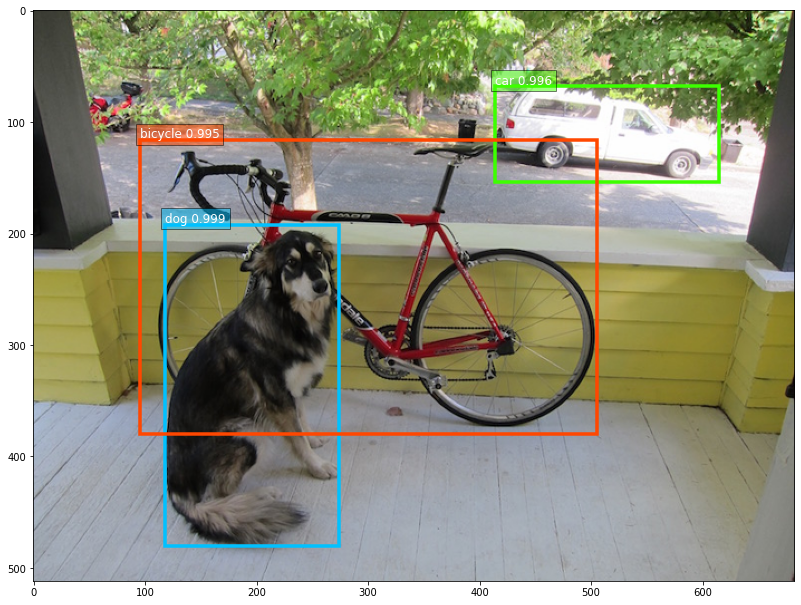

In [3]:
url = 'https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg'
#url = 'https://m.media-amazon.com/images/I/81NK3yCvMJL._SL1500_.jpg'
#url = 'https://img-prod-cms-rt-microsoft-com.akamaized.net/cms/api/am/imageFileData/RE4q3JG?ver=1f8b&q=60&m=6&h=384&w=768&b=%23FFFFFFFF&l=f&o=t&aim=true'

im_fname = utils.download(url, path='img.jpg', overwrite = True)

    
x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)
class_IDs, scores, bounding_boxes = net(x)
ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()